<a href="https://colab.research.google.com/github/cmottao/MetNumUN2024II/blob/master/Lab2/cmottao_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U fortran-magic==0.8 ipython==7.34.0 numpy==1.25.2 setuptools==67.7.2

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time
matmul(a, b)

CPU times: user 45 µs, sys: 0 ns, total: 45 µs
Wall time: 50.3 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.220
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4400.44
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time
matmul(a, b)

IndexError: list index out of range

**My own example 3 - Checking the matrix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B after checking compatibility."""

    if len(A[0]) != len(B):
        raise ValueError("Matrix multiplication not possible: number of columns in A must match number of rows in B.")

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time
matmul(a, b)

ValueError: Matrix multiplication not possible: number of columns in A must match number of rows in B.

**My own example 5 - Defining A and B that are compatible for multiplcation**

In [ ]:
A = [[1, 0, 0],
     [0, 1, 0],
     [0, 0, 1]]
B = [[9, 8],
     [7, 6],
     [5, 4]]

**My own example 6 - Running the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time
matmul(A, B)

CPU times: user 28 µs, sys: 3 µs, total: 31 µs
Wall time: 36.7 µs


[[9, 8], [7, 6], [5, 4]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-1.3664410630114607

In [ ]:
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.5221834598345633, 0.8642518589204486, 0.24278129774543078],
 [0.5367238745118905, 0.36507828085906213, 0.1203128056387548]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time

average_python = 0
n = 10

for _ in range(n):
    randa = random_matrix(600, 100)
    randb = random_matrix(100, 600)

    start_time = time.time()
    matmul(randa, randb)
    end_time = time.time()

    average_python += end_time - start_time

average_python /= n

print(f"Average execution time over {n} runs: {average_python:.4f} seconds")

Average execution time over 10 runs: 10.1232 seconds


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
data = [{'Method': 'Python', 'Average execution time (seconds)': average_python}]
df = pd.DataFrame(data)
df

,Method,Average execution time (seconds)
0,Python,10.123168


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
average_numpy = 0
n = 10

for _ in range(n):
    randa = np.random.rand(600, 100)
    randb = np.random.rand(100, 600)

    start_time = time.time()
    randa @ randb
    end_time = time.time()

    average_numpy += end_time - start_time

average_numpy /= n

print(f"Average execution time over {n} runs: {average_numpy:.4f} seconds")

data = [{'Method': 'Numpy', 'Average execution time (seconds)': average_numpy}]
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
df

Average execution time over 10 runs: 0.0053 seconds


,Method,Average execution time (seconds)
0,Python,10.123168
1,Numpy,0.005270


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.6 s, sys: 29.8 ms, total: 10.6 s
Wall time: 12.4 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 10.7 ms, sys: 0 ns, total: 10.7 ms
Wall time: 11 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 234 µs, sys: 0 ns, total: 234 µs
Wall time: 241 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Defining A (2x2)  and B (2x2)**

In [ ]:
A = [[2, 4],
     [1, 2]]
B = [[1, 0],
     [0, 1]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(A, B, result)
    implicit none  ! Add this line for stricter type checking
    double precision, dimension (:, :), intent(in) :: A
    double precision, dimension (:, :), intent(in) :: B
    double precision, dimension (2, 2), intent(out) :: result

    result = matmul(A, B)
end

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
fortran_matmul(A, B)

array([[2., 4.],
       [1., 2.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(A, B, result)
    implicit none  ! Add this line for stricter type checking
    double precision, dimension (:, :), intent(in) :: A
    double precision, dimension (:, :), intent(in) :: B
    double precision, dimension (600, 600), intent(out) :: result

    result = matmul(A, B)
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = fortran_matmul(randa, randb)

CPU times: user 32.7 ms, sys: 5 ms, total: 37.8 ms
Wall time: 41.1 ms


**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
average_sub_fortran = 0
n = 10

for _ in range(n):
    randa = np.random.rand(600, 100)
    randb = np.random.rand(100, 600)

    start_time = time.time()
    fortran_matmul(randa, randb)
    end_time = time.time()

    average_sub_fortran += end_time - start_time

average_sub_fortran /= n

print(f"Average execution time over {n} runs: {average_sub_fortran:.4f} seconds")

data = [{'Method': 'Fortran subroutine', 'Average execution time (seconds)': average_sub_fortran}]
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
df

Average execution time over 10 runs: 0.0051 seconds


,Method,Average execution time (seconds)
0,Python,10.123168
1,Numpy,0.005270
2,Fortran subroutine,0.005119


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
fortran_code = """
program multiply
    implicit none

    integer, parameter :: n = 600, m = 100, r = 10

    real(8) :: a(n, m)
    real(8) :: b(m, n)
    real(8) :: result(n, n)

    integer :: i
    real(8) :: start_time, end_time, average_fortran

    call random_seed()

    do i = 1, r
        call random_number(a)
        call random_number(b)

        call cpu_time(start_time)
        result = matmul(a, b)
        call cpu_time(end_time)

        average_fortran = average_fortran + (end_time - start_time)
    end do

    average_fortran = average_fortran / real(r)

    print *, "Average execution time over ", r, " runs: ", average_fortran, " seconds"
end program multiply
"""

with open("multiply.f90", "w") as f:
    f.write(fortran_code)

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran -o multiply multiply.f90
!./multiply

 Average execution time over           10  runs:    6.9835000000000010E-003  seconds


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
data = [{'Method': 'Fortran', 'Average execution time (seconds)': 0.0069}]
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
df

,Method,Average execution time (seconds)
0,Python,10.123168
1,Numpy,0.005270
2,Fortran subroutine,0.005119
3,Fortran,0.006900


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
c_code = """
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

const int N = 600, M = 100, R = 10;

void matmul(double a[N][M], double b[M][N], double result[N][N]) {
    for(int i = 0; i < N; i++) {
        for(int j = 0; j < N; j++) {
            result[i][j] = 0;
            for(int k = 0; k < M; k++) {
                result[i][j] += a[i][k] * b[k][j];
            }
        }
    }
}

int main() {
    double a[N][M], b[M][N], result[N][N];
    double start_time, end_time, average_c = 0.0;

    for(int i = 0; i < R; i++) {
        start_time = (double)clock() / CLOCKS_PER_SEC;
        matmul(a, b, result);
        end_time = (double)clock() / CLOCKS_PER_SEC;

        average_c += end_time - start_time;
    }

    average_c /= R;

    printf("Average execution time over %d runs: %f seconds", R, average_c);

    return 0;
}

"""

with open("multiply.c", "w") as f:
    f.write(c_code)

**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc -o multiply multiply.c
!./multiply

Average execution time over 10 runs: 0.210209 seconds

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
data = [{'Method': 'C', 'Average execution time (seconds)': 0.210209}]
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
df

,Method,Average execution time (seconds)
0,Python,10.123168
1,Numpy,0.005270
2,Fortran subroutine,0.005119
3,Fortran,0.006900
4,C,0.210209


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
cpp_code = """
#include <cstdio>
#include <cstdlib>
#include <ctime>

const int N = 600, M = 100, R = 10;

void matmul(double a[N][M], double b[M][N], double result[N][N]) {
    for(int i = 0; i < N; i++) {
        for(int j = 0; j < N; j++) {
            result[i][j] = 0;
            for(int k = 0; k < M; k++) {
                result[i][j] += a[i][k] * b[k][j];
            }
        }
    }
}

int main() {
    double a[N][M], b[M][N], result[N][N];
    double start_time, end_time, average_cpp = 0.0;

    for(int i = 0; i < R; i++) {
        start_time = (double)clock() / CLOCKS_PER_SEC;
        matmul(a, b, result);
        end_time = (double)clock() / CLOCKS_PER_SEC;

        average_cpp += end_time - start_time;
    }

    average_cpp /= R;

    printf("Average execution time over %d runs: %f seconds", R, average_cpp);

    return 0;
}

"""

with open("multiply.cpp", "w") as f:
    f.write(cpp_code)

**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ -o multiply multiply.cpp
!./multiply

Average execution time over 10 runs: 0.285840 seconds

**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
data = [{'Method': 'C++', 'Average execution time (seconds)': 0.285840}]
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
df

,Method,Average execution time (seconds)
0,Python,10.123168
1,Numpy,0.005270
2,Fortran subroutine,0.005119
3,Fortran,0.006900
4,C,0.210209
5,C++,0.285840


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
java_code = """
public class Multiply {
    public static final int N = 600, M = 100, R = 10;

    public static void matmul(double[][] a, double[][] b, double[][] result) {
        for (int i = 0; i < N; i++) {
            for (int j = 0; j < N; j++) {
                result[i][j] = 0;
                for (int k = 0; k < M; k++) {
                    result[i][j] += a[i][k] * b[k][j];
                }
            }
        }
    }

    public static void main(String[] args) {
        double[][] a = new double[N][M];
        double[][] b = new double[M][N];
        double[][] result = new double[N][N];
        double start_time, end_time, average_java = 0.0;

        for (int i = 0; i < R; i++) {
            start_time = System.nanoTime();
            matmul(a, b, result);
            end_time = System.nanoTime();

            average_java += (end_time - start_time) / 1e9;
        }

        average_java /= R;

        System.out.printf("Average execution time over %d runs: %.6f seconds", R, average_java);
    }
}
"""

with open("Multiply.java", "w") as f:
    f.write(java_code)

**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac Multiply.java
!java Multiply

Average execution time over 10 runs: 0.71792 seconds


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
data = [{'Method': 'Java', 'Average execution time (seconds)': 0.71792}]
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
df

,Method,Average execution time (seconds)
0,Python,10.123168
1,Numpy,0.005270
2,Fortran subroutine,0.005119
3,Fortran,0.006900
4,C,0.210209
5,C++,0.285840
6,Java,0.717920


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
javascript_code = """
const N = 600, M = 100, R = 10;

function matmul(a, b) {
    let result = new Array(N).fill().map(() => new Array(N).fill(0));
    for (let i = 0; i < N; i++) {
        for (let j = 0; j < N; j++) {
            for (let k = 0; k < M; k++) {
                result[i][j] += a[i][k] * b[k][j];
            }
        }
    }
    return result;
}

function generateMatrix(rows, cols) {
    let matrix = new Array(rows).fill().map(() => new Array(cols).fill(0).map(() => Math.random()));
    return matrix;
}

let average_javascript = 0.0;

for (let i = 0; i < R; i++) {
    const a = generateMatrix(N, M);
    const b = generateMatrix(M, N);

    const start_time = performance.now();
    matmul(a, b);
    const end_time = performance.now();

    average_javascript += (end_time - start_time) / 1000;
}

average_javascript /= R;

console.log(`Average execution time over ${R} runs: ${average_javascript.toFixed(6)} seconds`);
"""

with open("multiply.js", "w") as f:
    f.write(javascript_code)

**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node multiply.js

Average execution time over 10 runs: 0.559007 seconds


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
data = [{'Method': 'Javascript', 'Average execution time (seconds)': 0.559007}]
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
df

,Method,Average execution time (seconds)
0,Python,10.123168
1,Numpy,0.005270
2,Fortran subroutine,0.005119
3,Fortran,0.006900
4,C,0.210209
5,C++,0.285840
6,Java,0.717920
7,Javascript,0.559007


**My own example 31 - Finding the minimun average execuiton time in the data frame**

In [ ]:
min_time_value = df['Average execution time (seconds)'].min()
min_time_row = df[df['Average execution time (seconds)'] == min_time_value]

print("Method with the minimum execution time:", min_time_row)

Method with the minimum execution time:                Method  Average execution time (seconds)
2  Fortran subroutine                          0.005119


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
df['Speed factor'] = min_time_value / df['Average execution time (seconds)']
df

,Method,Average execution time (seconds),Speed factor
0,Python,10.123168,0.000506
1,Numpy,0.005270,0.971456
2,Fortran subroutine,0.005119,1.000000
3,Fortran,0.006900,0.741931
4,C,0.210209,0.024353
5,C++,0.285840,0.017910
6,Java,0.717920,0.007131
7,Javascript,0.559007,0.009158


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df = df.sort_values(by='Average execution time (seconds)', ascending = True)
df

,Method,Average execution time (seconds),Speed factor
2,Fortran subroutine,0.005119,1.000000
1,Numpy,0.005270,0.971456
3,Fortran,0.006900,0.741931
4,C,0.210209,0.024353
5,C++,0.285840,0.017910
7,Javascript,0.559007,0.009158
6,Java,0.717920,0.007131
0,Python,10.123168,0.000506


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

In [ ]:
data + data

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Laboratory 2.2

In [ ]:
import requests
import pandas as pd

response = requests.get('https://www.datos.gov.co/resource/h2yr-zfb2.json')
res = response.json()

data = pd.DataFrame(res)

display(data)

,departamento,c_digo_divipola_departamento,municipio,c_digo_divipola_municipio,programa,a_o_de_asignaci_n,estado_de_postulaci_n,hogares,valor_asignado
0,AMAZONAS,91,LETICIA,91001,Bolsa Desastres Naturales,2008,Apto con subsidio vencido,37,336984900
1,AMAZONAS,91,LETICIA,91001,Bolsa Desplazados,2009,Asignados,3,18633750
2,AMAZONAS,91,LETICIA,91001,Bolsa Ordinaria,2003,Apto con subsidio vencido,1,5280000
3,AMAZONAS,91,LETICIA,91001,Bolsa Ordinaria,2003,Asignados,2,12049000
4,AMAZONAS,91,LETICIA,91001,Habilitación de Titulos,2005,Asignados,215,22790000
...,...,...,...,...,...,...,...,...,...
995,ANTIOQUIA,5,BELLO,5088,Casa Digna Vida Digna,2022,Renuncias al subsidio,1,10617761
996,ANTIOQUIA,5,BELLO,5088,Bolsa Desplazados,2011,Asignados,2,32136000
997,ANTIOQUIA,5,BELLO,5088,Bolsa Ordinaria,2003,Restitución SFV por Indemnización,7,49749000
998,ANTIOQUIA,5,BELLO,5088,Bolsa Ordinaria,2004,Apto con subsidio vencido,4,27566000


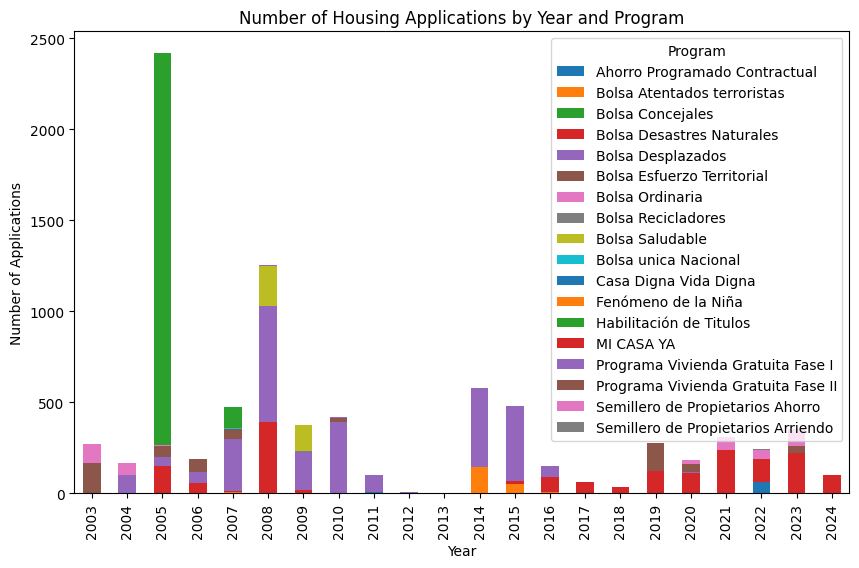

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data['hogares'] = pd.to_numeric(data['hogares'], errors='coerce')

applications_by_year = data.groupby(['a_o_de_asignaci_n', 'programa'])['hogares'].sum().unstack(fill_value=0)

applications_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Number of Housing Applications by Year and Program')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.legend(title='Program')
plt.show()

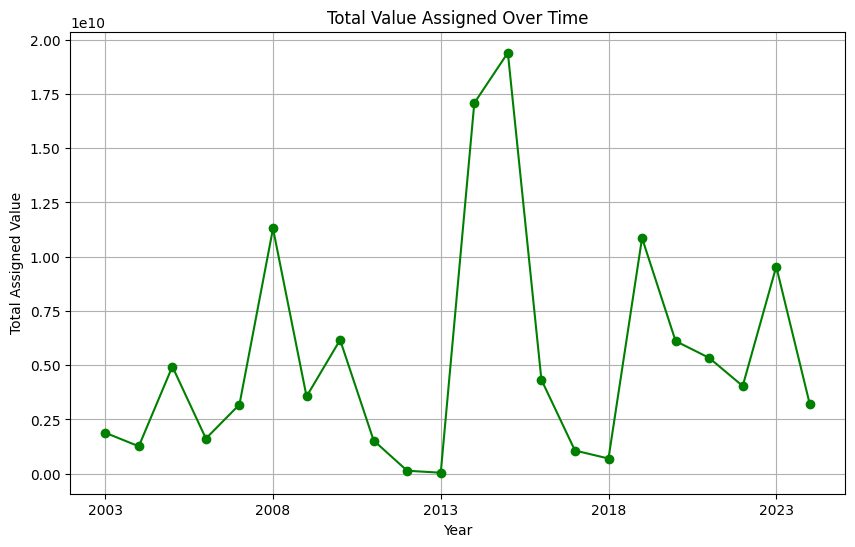

In [ ]:
data['valor_asignado'] = pd.to_numeric(data['valor_asignado'], errors='coerce')

value_by_year = data.groupby('a_o_de_asignaci_n')['valor_asignado'].sum()

plt.figure(figsize=(10, 6))
value_by_year.plot(kind='line', color='green', marker='o')

plt.title('Total Value Assigned Over Time')
plt.xlabel('Year')
plt.ylabel('Total Assigned Value')
plt.grid(True)
plt.show()

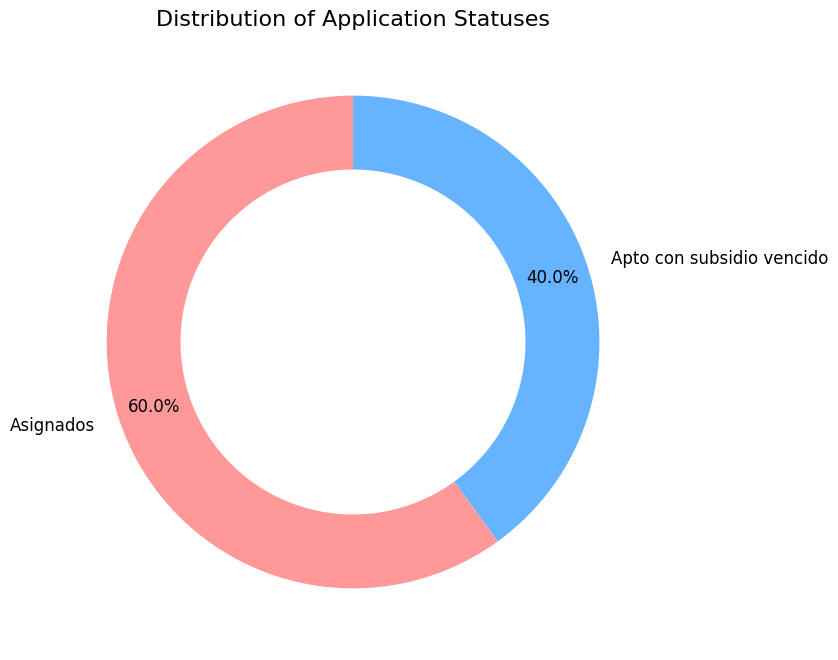

In [ ]:
data = pd.DataFrame({
    'estado_de_postulaci_n': [
        'Apto con subsidio vencido', 'Asignados', 'Apto con subsidio vencido', 'Asignados', 'Asignados'
    ]
})

status_distribution = data['estado_de_postulaci_n'].value_counts()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(8, 8))
plt.pie(
    status_distribution,
    labels=status_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(status_distribution)],
    pctdistance=0.85,
    textprops={'fontsize': 12}
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

plt.title("Distribution of Application Statuses", fontsize=16)
plt.show()

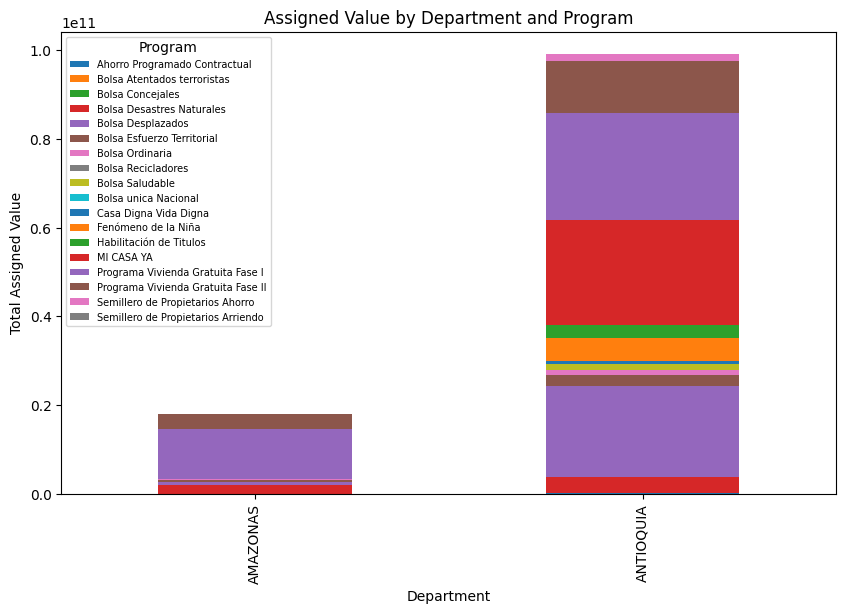

In [ ]:
data['valor_asignado'] = pd.to_numeric(data['valor_asignado'], errors='coerce')

value_by_department_program = data.groupby(['departamento', 'programa'])['valor_asignado'].sum().unstack().fillna(0)

value_by_department_program.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Assigned Value by Department and Program')
plt.xlabel('Department')
plt.ylabel('Total Assigned Value')
plt.legend(title='Program', fontsize=7)

plt.show()

# Thanks!